In [112]:
#Importação das Bibliotecas 

import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

import mglearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics

import seaborn as sb

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")


In [113]:
# Importando as bibliotecas necessárias:


In [114]:
# Ultilizando a biblioteca pandas para importação dos dados

#df = pd.read_excel("data.xlsx", header = [0])
df = pd.read_csv("data2.csv",header = [0])

In [115]:
dados = df[:546] 


In [116]:
df.shape

(546, 69)

In [117]:
X = dados.drop(["QT","Óbito", "Dispersão Qtend", "Paciente", "Nome do Paciente", "Prontuario","Date Nasc ", "Data Holter","Nat.","Classificação","Rassi escore", "Diretriz 2005","Obs", "EVTotal", "ECO"], axis = 1)
test = X.loc[1]
y = dados["MS"]

In [118]:
features = X
labels = y

In [119]:
my_list = X.columns.values.tolist()

In [120]:
my_list

['Idade',
 'Sexo',
 'BMI ',
 'Cancer',
 'HAS',
 'DM2',
 'Cardiopatia Outra',
 'Marcapasso',
 'Sincope',
 'Fibrilação/Flutter Atrial',
 'I R Crônica',
 'DLP',
 'Coronariopatia',
 'Embolia Pulmonar',
 'Ins Cardiaca ',
 'AVC',
 'DVP',
 'TSH',
 'Tabagismo',
 'Alcoolismo',
 'Sedentarismo',
 'ECG ',
 'FC',
 'Alt Prim',
 'Dist Cond InterVent ',
 'Dist Cond AtrioVent ',
 'Pausa > 3s ',
 'ESV',
 'EV',
 'TVMNS',
 'Area Elet inativa',
 'Holter',
 'Dist Cond AtrioVent',
 'Disf Nodulo Sinusal',
 'Fibri/Flutter Atrial',
 'FC media',
 'TVS',
 'TVMNS.1',
 'EV.1',
 'ECO (0 1)',
 'AE diam.',
 'VED',
 'VES',
 'FE Teicholz',
 'Classificação (1)',
 'Disf Diastolica',
 'Deficit Seg',
 'NYHA',
 'Rassi pontos',
 'Unnamed: 59',
 'CDI ',
 'Ablações',
 'Amiodarona',
 'MS']

In [121]:
#Importando o encoder para transformar as labels em chaves numéricas
from sklearn.preprocessing import OneHotEncoder
Oht_enc = OneHotEncoder()
X = pd.DataFrame(Oht_enc.fit_transform(X).A)

In [122]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [123]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 


In [124]:
#Importando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier  

# Definindo o valor de visinhos
classifier = KNeighborsClassifier(n_neighbors=5)  

#Treinando o modelo, com dados de treinamento
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [125]:
#### Prevendo os valores de Y para os dados de teste (X_test)
y_pred = classifier.predict(X_test) 

In [126]:
# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  


# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Matriz Confusa: 
[[138   0]
 [ 16  10]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       138
           1       1.00      0.38      0.56        26

    accuracy                           0.90       164
   macro avg       0.95      0.69      0.75       164
weighted avg       0.91      0.90      0.88       164

Acurácia do modelo:  0.9024390243902439


In [127]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 25):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

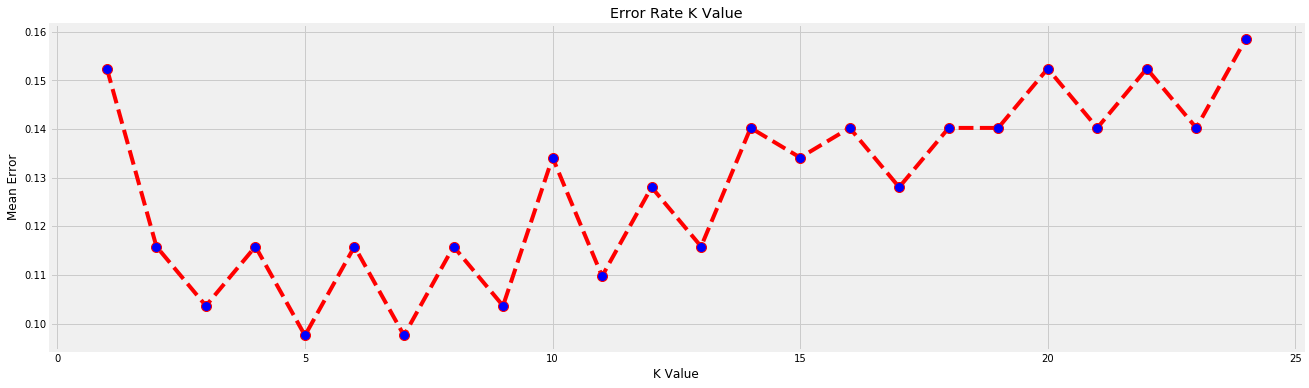

In [128]:
plt.figure(figsize=(20, 6))  
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [129]:
# Treinando o modelo KNN com o melhor parâmetro para K

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [130]:
# Aplicando os valores de teste novamente
y_pred = classifier.predict(X_test) 

In [131]:
# Importando métricas para validação do modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  

# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  


# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Matriz Confusa: 
[[138   0]
 [ 16  10]] 

Relatório de classificação: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       138
           1       1.00      0.38      0.56        26

    accuracy                           0.90       164
   macro avg       0.95      0.69      0.75       164
weighted avg       0.91      0.90      0.88       164

Acurácia do modelo:  0.9024390243902439


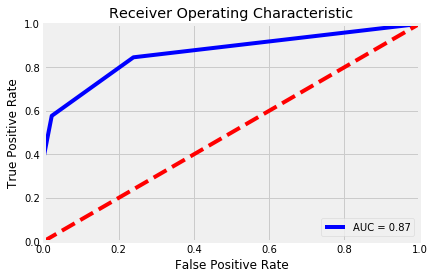

In [132]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [133]:

# Training predictions (to demonstrate overfitting)
train_rf_predictions = classifier.predict(X_train)
train_rf_probs = classifier.predict_proba(X_train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = classifier.predict(X_test)
rf_probs = classifier.predict_proba(X_test)[:, 1]


Recall Baseline: 1.0 Test: 0.38 Train: 0.59
Precision Baseline: 0.16 Test: 1.0 Train: 0.97
Roc Baseline: 0.5 Test: 0.87 Train: 0.98


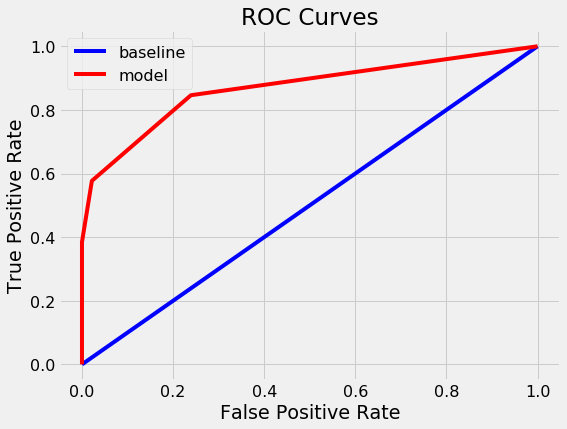

Confusion matrix, without normalization
[[138   0]
 [ 16  10]]


<Figure size 432x288 with 0 Axes>

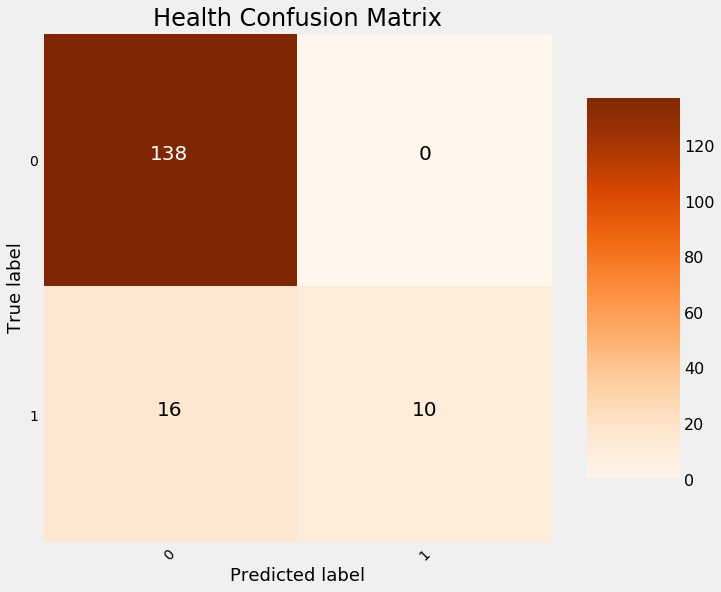

In [134]:

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, 
                                     [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, 
                                      [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['0', '1'],
                      title = 'Health Confusion Matrix')

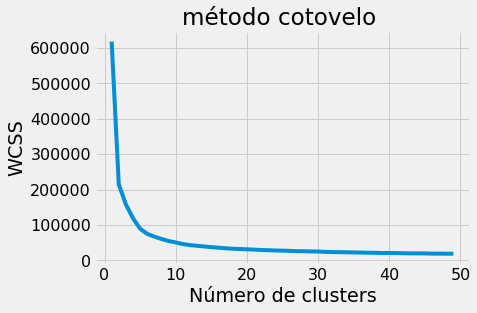

In [154]:
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.title('método cotovelo ')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [155]:
kmeans = KMeans(n_clusters=6, max_iter=300, n_init=10, random_state=10)


In [156]:
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [157]:
y_pred = kmeans.labels_
y_test = features


In [158]:
df["K-classes"] = kmeans.labels_


In [159]:
df

,Paciente,Nome do Paciente,Prontuario,Date Nasc,Data Holter,Idade,Sexo,Nat.,BMI,Cancer,...,Diretriz 2005,QT,Dispersão Qtend,CDI,Ablações,Amiodarona,Óbito,Obs,MS,K-classes
0,NaN,Adão Severo de Souza,333104.0,11/29/1950,7/8/2010,59,1,PI,25,0,...,A,NaN,NaN,0,0,0,0,Psoriase,0,0
1,NaN,Adão Severo de Souza,NaN,11/29/1950,1/14/2010,59,1,PI,23,0,...,A,NaN,NaN,0,0,0,0,Psoriase,0,0
2,NaN,Adão Severo de Souza,NaN,11/29/1950,5/27/2009,58,1,PI,24,0,...,A,NaN,NaN,0,0,0,0,NaN,0,0
3,NaN,Adão Severo de Souza,NaN,11/29/1950,11/3/1997,46,1,PI,26,0,...,A,NaN,NaN,0,0,0,0,NaN,0,0
4,NaN,Adão Severo de Souza,NaN,11/29/1950,5/21/2013,62,1,PI,25,0,...,A,NaN,NaN,0,0,0,0,NaN,0,0
5,NaN,Adão Severo de Souza,NaN,11/29/1950,5/22/2013,62,1,PI,28,0,...,A,NaN,NaN,0,0,0,0,NaN,0,0
6,NaN,Adélia Francelina Alves,NaN,5/3/1952,6/16/2009,57,0,PE,29,0,...,B2,NaN,NaN,0,1,1,0,ruptura de cordoalha em meados de 2009,0,0
7,Eco Inical,Adélia Francelina Alves,NaN,5/3/1952,9/4/2002,50,0,PE,28,0,...,B2,NaN,NaN,0,0,1,0,NaN,0,2
8,NaN,Adguimar Freitas Borges,225863.0,9/11/1952,6/17/1995,42,1,MG,31,0,...,A,NaN,NaN,0,0,0,0,NaN,0,5
9,NaN,Adguimar Freitas Borges,NaN,9/11/1952,12/2/2002,50,1,MG,29,0,...,A,NaN,NaN,0,0,0,0,NaN,0,0


In [160]:
alabel =labels.to_numpy()

In [161]:
rmse = sqrt(mean_squared_error(alabel,kmeans.labels_))
rmse

2.7622520938604844

In [162]:
alabel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
kmeans.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [37]:
clf = DecisionTreeClassifier()

In [38]:
clf = clf.fit(X_train,y_train)

In [39]:
import os
os.environ["PATH"] += os.pathsep + '"C:/Program Files (x86)/graphviz-2.38/bin/'

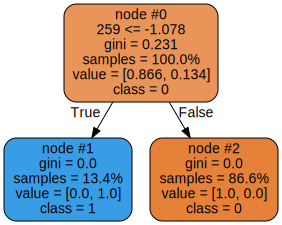

In [40]:
# Renderizando a árvore de forma gráfica:
import pydot
import graphviz


dot_data = export_graphviz( 
         clf,out_file=None,
         feature_names=X.columns, class_names=['0','1'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=False
        )  
graph = graphviz.Source(dot_data)  

graph



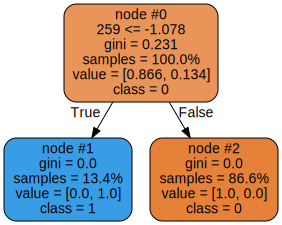

In [41]:
graph

In [42]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature labels
features_label = X.columns

# class label
class_label = ['0','1']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [43]:
# Renderizando a árvore de forma gráfica:
import pydot
import graphviz


dot_data = export_graphviz( 
         clf,out_file=None,
         feature_names=X.columns, class_names=['0','1'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=False
        )  
graph = graphviz.Source(dot_data)  


In [44]:
for feature,importancia in zip(X.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

0:0.0
1:0.0
2:0.0
3:0.0
4:0.0
5:0.0
6:0.0
7:0.0
8:0.0
9:0.0
10:0.0
11:0.0
12:0.0
13:0.0
14:0.0
15:0.0
16:0.0
17:0.0
18:0.0
19:0.0
20:0.0
21:0.0
22:0.0
23:0.0
24:0.0
25:0.0
26:0.0
27:0.0
28:0.0
29:0.0
30:0.0
31:0.0
32:0.0
33:0.0
34:0.0
35:0.0
36:0.0
37:0.0
38:0.0
39:0.0
40:0.0
41:0.0
42:0.0
43:0.0
44:0.0
45:0.0
46:0.0
47:0.0
48:0.0
49:0.0
50:0.0
51:0.0
52:0.0
53:0.0
54:0.0
55:0.0
56:0.0
57:0.0
58:0.0
59:0.0
60:0.0
61:0.0
62:0.0
63:0.0
64:0.0
65:0.0
66:0.0
67:0.0
68:0.0
69:0.0
70:0.0
71:0.0
72:0.0
73:0.0
74:0.0
75:0.0
76:0.0
77:0.0
78:0.0
79:0.0
80:0.0
81:0.0
82:0.0
83:0.0
84:0.0
85:0.0
86:0.0
87:0.0
88:0.0
89:0.0
90:0.0
91:0.0
92:0.0
93:0.0
94:0.0
95:0.0
96:0.0
97:0.0
98:0.0
99:0.0
100:0.0
101:0.0
102:0.0
103:0.0
104:0.0
105:0.0
106:0.0
107:0.0
108:0.0
109:0.0
110:0.0
111:0.0
112:0.0
113:0.0
114:0.0
115:0.0
116:0.0
117:0.0
118:0.0
119:0.0
120:0.0
121:0.0
122:0.0
123:0.0
124:0.0
125:0.0
126:0.0
127:0.0
128:0.0
129:0.0
130:0.0
131:0.0
132:0.0
133:0.0
134:0.0
135:0.0
136:0.0
137:0.0
138:0.

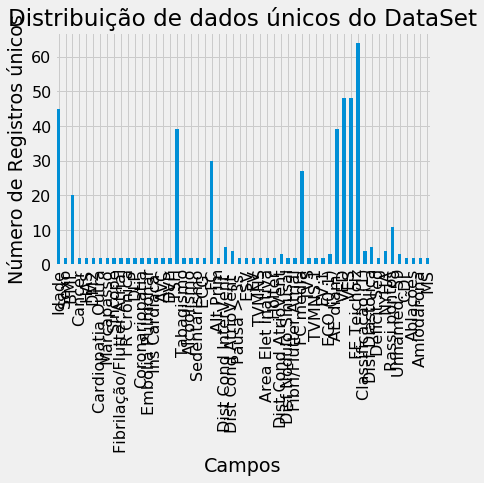

In [45]:
def distribuicao (data):
    '''
    Esta função exibirá a quantidade de registros únicos para cada coluna
    existente no dataset
    
    dataframe -> Histogram
    '''
    # Calculando valores unicos para cada label: num_unique_labels
    num_unique_labels = data.apply(pd.Series.nunique)

    # plotando valores
    num_unique_labels.plot( kind='bar')
    
    # Nomeando os eixos
    plt.xlabel('Campos')
    plt.ylabel('Número de Registros únicos')
    plt.title('Distribuição de dados únicos do DataSet')
    
    # Exibindo gráfico

    plt.show()

distribuicao(features)